Populating the interactive namespace from numpy and matplotlib
reading Gsulf/c:scaf_1 ...
reading DvulH/c:scaf_1 ...
reading DdesulfG20/c:scaf_1 ...
reading EcoliK12/c:scaf_1 ...
reading Bsub/c:scaf_1 ...
reading DaudaxMP104C/c:scaf_1 ...


<IPython.core.display.Javascript object>


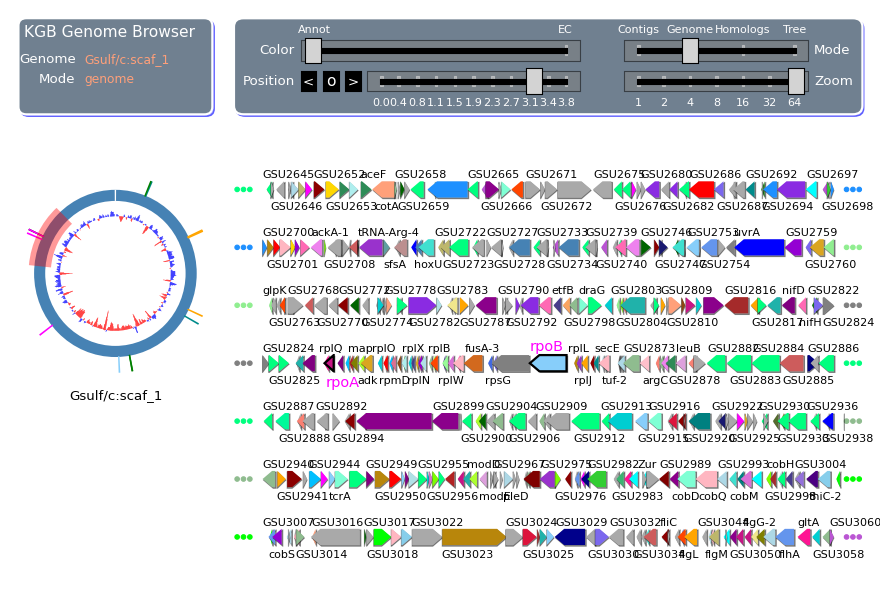

0 reading ./data_example/NCBI_genome_contigs/Gsulf/scaffolds/scaf_1.gbk
1 reading ./data_example/NCBI_genome_contigs/DvulH/scaffolds/scaf_1.gbk
2 reading ./data_example/NCBI_genome_contigs/DdesulfG20/scaffolds/scaf_1.gbk
3 reading ./data_example/NCBI_genome_contigs/EcoliK12/scaffolds/scaf_1.gbk
4 reading ./data_example/NCBI_genome_contigs/Bsub/scaffolds/scaf_1.gbk
5 reading ./data_example/NCBI_genome_contigs/DaudaxMP104C/scaffolds/scaf_1.gbk


In [109]:
###############################################################################
# KGB user input vars  (Preferably implement as separate upstream cell)
###############################################################################        


################################################################################################
# Config #1: local notebook with NCBI annotated genbank format genomes and gene tree           #
#            Domain Annotations: NO (KBase domain annotations require KBase genome annotation) #
#            Gene Tree: YES                                                                    #
#            Search Terms: YES                                                                 #
################################################################################################
                                                                                             
%pylab notebook
KBase_backend = False

GenomeSet_names = ["Gsulf", "DvulH", "DdesulfG20", "EcoliK12", "Bsub", "DaudaxMP104C"]
ContigSet_names = []
PivotFeatures_IDs = ["GSU2863", "DVU2928", "Dde_2997", "b3987", "BSU01070", "Daud0216"]
PrimaryAnchor_leafId = "Gsulf rpoB"
PrimaryAnchor_locusTag = "GSU2863"

genome_annotation_system = 'NCBI'
genome_data_format = "Genbank"
# if relative path to scaffolds is e.g.: ./data_example/NCBI_genome_contigs/Gsulf/scaffolds/scaf_1.gbk
gbk_ext = "gbk"
genome_data_base_path = "./data_example/NCBI_genome_contigs"
genome_data_extra_subpath = "/scaffolds"

domain_data_exists = False  # NCBI annotated genome
domain_data_format = None
domain_data_base_path = None
domain_data_extra_subpath = None
domain_family_desc_base_path = None

tree_data_format = 'newick'
# if relative path to tree is e.g.: ./data_example/trees/rpoB_tree-names.newick
tree_data_base_path = './data_example/trees'
tree_data_file = 'rpoB_tree-names.newick'

Search_Terms = ['dna-directed polymerase',
                '16S',
                'DNA and methyltransferase',
                '1.10.3.-',
                'fucI',
                'sulfate adenylyl transferase']

from urllib.request import urlopen
import_code = urlopen('https://raw.githubusercontent.com/dcchivian/KGB/master/KGB.py')
exec(import_code.read())



